In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import os


In [ ]:
df_m = pd.read_csv("movie.csv", names=["MovieID", "Title", "Genres"] )
df_m.head()

,MovieID,Title,Genres
0,movieId,title,genres
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [ ]:
# Drop the first row (header) using iloc
df_m = df_m.iloc[1:]

# Reset the index after dropping the first row
df_m.reset_index(drop=True, inplace=True)

# Now df_m will contain the data without the first row (header)
df_m.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_u = pd.read_csv("users.dat", engine='python', sep='::', names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

In [ ]:
df_u.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
df_r = pd.read_csv("rating.csv", names=["UserID", "MovieID", "Rating", "Timestamp"], low_memory=False)
df_r.head()

,UserID,MovieID,Rating,Timestamp
0,userId,movieId,rating,timestamp
1,1,2,3.5,2005-04-02 23:53:47
2,1,29,3.5,2005-04-02 23:31:16
3,1,32,3.5,2005-04-02 23:33:39
4,1,47,3.5,2005-04-02 23:32:07


In [ ]:
df_merged1 = df_m.merge(df_r, how='outer')
df_merged1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


In [ ]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5613657 entries, 0 to 5613656
Data columns (total 6 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   MovieID    object
 1   Title      object
 2   Genres     object
 3   UserID     object
 4   Rating     object
 5   Timestamp  object
dtypes: object(6)
memory usage: 257.0+ MB


In [ ]:
# df_merged1['UserID'] = df_merged1['UserID'].astype('int64')

In [ ]:
import pandas as pd

# Assuming df_merged1 is your DataFrame containing merged data
# Check for NaN values in UserID column
nan_rows = df_merged1[df_merged1['UserID'].isna()]

# Display rows with NaN values in UserID column
print("Rows with NaN values in UserID column:")
print(nan_rows)

# Option 1: Remove rows with NaN values
df_merged1 = df_merged1.dropna(subset=['UserID'])

# Option 2: Fill NaN values with a specific value (e.g., -1)
# df_merged1['UserID'].fillna(-1, inplace=True)

# Option 3: Replace NaN values with a default value (e.g., 0)
# df_merged1['UserID'].fillna(0, inplace=True)

# Convert UserID column to int64 after handling NaN values
# df_merged1['UserID'] = df_merged1['UserID'].astype('int64')


Rows with NaN values in UserID column:
        MovieID                                              Title  \
2483783    1815                                        Eden (1997)   
3393823    2958                            Naturally Native (1998)   
3562597    3191                                 Quarry, The (1998)   
3573181    3237                 Kestrel's Eye (Falkens öga) (1998)   
3614159    3290                           Soft Toilet Seats (1999)   
...         ...                                                ...   
5613650  131252  Forklift Driver Klaus: The First Day on the Jo...   
5613651  131254                       Kein Bund für's Leben (2007)   
5613652  131256                      Feuer, Eis & Dosenbier (2002)   
5613654  131260                                Rentun Ruusu (2001)   
5613655  131262                                   Innocence (2014)   

                           Genres UserID Rating Timestamp  
2483783                     Drama    NaN    NaN       NaN  


In [ ]:
import pandas as pd

# Assuming df_merged1 is your DataFrame containing merged data
# Filter out rows where 'UserID' column does not contain numeric values
df_merged1 = df_merged1[df_merged1['UserID'].str.isnumeric()]

# Convert remaining values in 'UserID' column to int64
df_merged1['UserID'] = df_merged1['UserID'].astype('int64')

# Now check the data types again to ensure they match
print("Data Types in df_merged1 after conversion:")
print(df_merged1.dtypes)


Data Types in df_merged1 after conversion:
MovieID      object
Title        object
Genres       object
UserID        int64
Rating       object
Timestamp    object
dtype: object


In [ ]:
# df_merged2 = df_u.merge(df_r, how='inner')

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5607069 entries, 0 to 5607068
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   UserID     object
 1   MovieID    object
 2   Rating     object
 3   Timestamp  object
dtypes: object(4)
memory usage: 171.1+ MB


In [ ]:
# import pandas as pd

# # Load your DataFrames df_u and df_r

# # Check the data types of the UserID column in each DataFrame
# print("Data Types in df_u:")
# print(df_u.dtypes)

# print("\nData Types in df_r:")
# print(df_r.dtypes)

# # If there's a mismatch in data types, convert the UserID column in one DataFrame
# # For example, if df_r['UserID'] is of type object (string), convert it to int64
# df_r['UserID'] = df_r['UserID'].astype('int64')

# # Now check the data types again to ensure they match
# print("\nData Types in df_r after conversion:")
# print(df_r.dtypes)

# # Merge the DataFrames after ensuring the data types match
# df_merged = pd.merge(df_u, df_r, how='inner', on='UserID')

# # Now df_merged should contain the merged DataFrame without errors
# print("\nMerged DataFrame:")
# print(df_merged.head())


In [ ]:
import pandas as pd

# Load df_r skipping the first row (header row)
df_r = pd.read_csv("rating.csv", skiprows=1, names=["UserID", "MovieID", "Rating", "Timestamp"])

# Check the data types of df_r after loading
print("\nData Types in df_r after loading:")
print(df_r.dtypes)

# Convert UserID column to int64 (assuming it contains valid integer values)
df_r['UserID'] = df_r['UserID'].astype('int64')

# Now check the data types again to ensure they match
print("\nData Types in df_r after conversion:")
print(df_r.dtypes)



Data Types in df_r after loading:
UserID         int64
MovieID        int64
Rating       float64
Timestamp     object
dtype: object

Data Types in df_r after conversion:
UserID         int64
MovieID        int64
Rating       float64
Timestamp     object
dtype: object


In [ ]:
df_merged2 = pd.merge(df_u, df_r, how='inner', on='UserID')
df_merged2.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,2,3.5,2005-04-02 23:53:47
1,1,F,1,10,48067,29,3.5,2005-04-02 23:31:16
2,1,F,1,10,48067,32,3.5,2005-04-02 23:33:39
3,1,F,1,10,48067,47,3.5,2005-04-02 23:32:07
4,1,F,1,10,48067,50,3.5,2005-04-02 23:29:40


In [ ]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901248 entries, 0 to 901247
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UserID      901248 non-null  int64  
 1   Gender      901248 non-null  object 
 2   Age         901248 non-null  int64  
 3   Occupation  901248 non-null  int64  
 4   Zip-code    901248 non-null  object 
 5   MovieID     901248 non-null  int64  
 6   Rating      901248 non-null  float64
 7   Timestamp   901248 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.0+ MB


In [ ]:
df_merged3 = df_merged1.merge(df_merged2, how='inner')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
# Assuming you want to merge on 'UserID' column
# Convert 'UserID' column in df_merged2 to match the data type of df_merged1
df_merged2['UserID'] = df_merged2['UserID'].astype('int64')

# Now perform the merge
df_merged3 = df_merged1.merge(df_merged2, how='inner', on='UserID')


In [1]:
# new

In [2]:
!pip install modin --user
!pip install modin[ray] --user
!pip install scikit-surprise --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 35.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 43.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, us

In [1]:
import csv
import ray
import modin.pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from surprise.accuracy import rmse, mae
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import Reader, Dataset, dump, \
KNNBasic, KNNWithZScore, KNNWithMeans, \
SVD, SVDpp, SlopeOne, CoClustering, NormalPredictor

ray.init()
%matplotlib inline
plt.style.use('fivethirtyeight')

2024-04-17 15:35:45,821	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [ ]:
#Read and frmat

In [6]:
tags_df = pd.read_csv('tags.csv', usecols = ['userId', 'movieId', 'tag'])
g = {i:lambda x: '|'.join(list(x)) for i in tags_df.columns[2:]}


# Now perform the groupby and aggregation
g = {i: lambda x: '|'.join(list(x)) for i in tags_df.columns[2:]}
tags_df = tags_df.groupby(['userId', 'movieId']).agg(g).reset_index()

tags_df = tags_df.groupby(['userId', 'movieId']).agg(g).reset_index()
ratings_df = pd.read_csv('ratings.csv', usecols = ['userId', 'movieId', 'rating'])

movie_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

movies_df = pd.merge(movie_df, links_df, on=['movieId'])
reviews_df = pd.merge(ratings_df, tags_df, on=['userId', 'movieId'])

In [ ]:
# EDA

In [7]:
display(reviews_df)

,userId,movieId,rating,tag
0,2,60756,5.0,funny|Highly quotable|will ferrell
1,2,89774,5.0,Boxing story|MMA|Tom Hardy
2,2,106782,5.0,drugs|Leonardo DiCaprio|Martin Scorsese
3,7,48516,1.0,way too long
4,18,431,4.0,Al Pacino|gangster|mafia
...,...,...,...,...
1630,606,5694,3.0,70mm
1631,606,6107,4.0,World War II
1632,606,7382,4.5,for katie
1633,610,3265,5.0,gun fu|heroic bloodshed


In [8]:
reviews_df['rating'].describe()

count    1635.000000
mean        3.764526
std         0.861719
min         0.500000
25%         3.500000
50%         4.000000
75%         4.250000
max         5.000000
Name: rating, dtype: float64

In [9]:
print('Number of distinct Users : {}'.format(len(reviews_df['userId'].unique())))
print('Number of distinct Movies : {}'.format(len(reviews_df['movieId'].unique())))
print('Number of distinct Ratings: {}'.format(len(reviews_df['rating'].unique())))

Number of distinct Users : 54
Number of distinct Movies : 1464
Number of distinct Ratings: 10


Text(0, 0.5, 'Count')

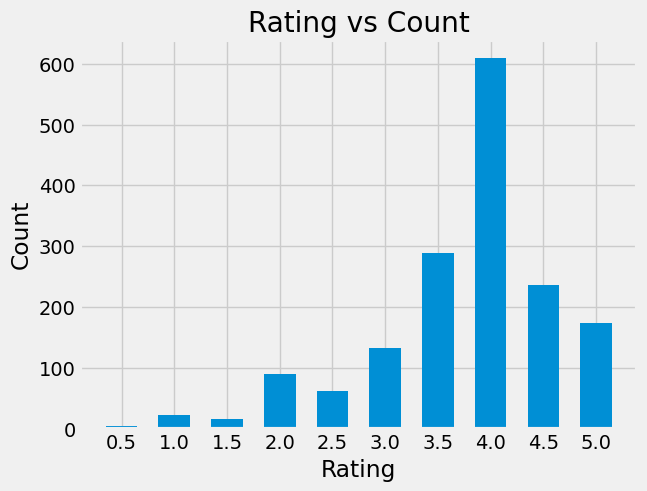

In [10]:
ratings_df = reviews_df.groupby(by=['rating']).agg({'userId': 'count'}).rename(columns={'userId': 'count'}).reset_index()
plt.bar(ratings_df['rating'], ratings_df['count'], align='center', width=0.3)
plt.xticks(ratings_df['rating'])
plt.title("Rating vs Count")
plt.xlabel("Rating")
plt.ylabel("Count")

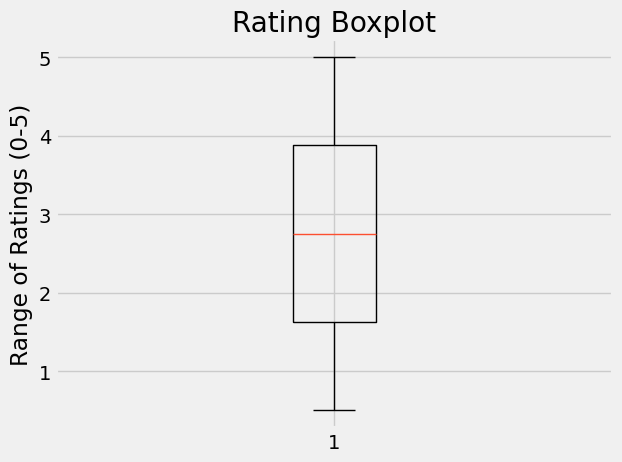

In [11]:
plt.boxplot(ratings_df['rating'])
plt.title("Rating Boxplot")
plt.ylabel("Range of Ratings (0-5)")
plt.show()

In [12]:
display(movies_df)

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


<Axes: title={'center': 'Genre vs Count'}, xlabel='Genres', ylabel='Count'>

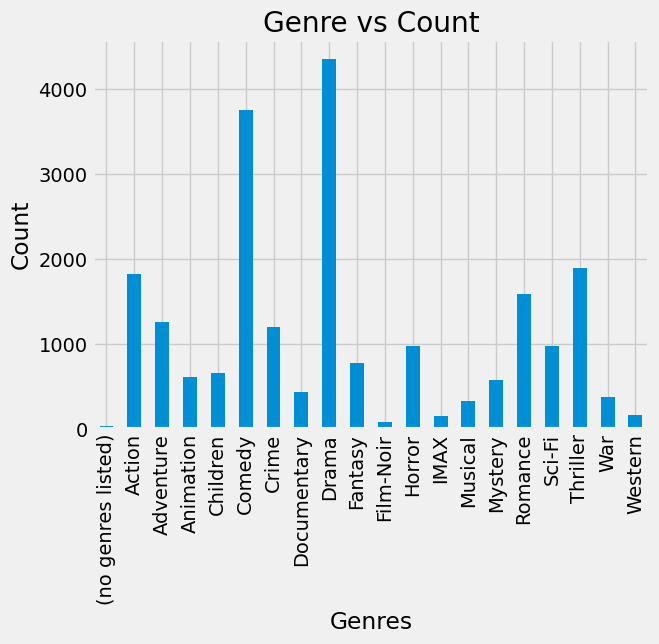

In [13]:
genre_exploded_movies_df = movies_df[['movieId', 'genres']].set_index(['movieId']).apply(lambda x: x.str.split('|').explode()).reset_index()
genre_exploded_movies_df.groupby(['genres']).size().plot(kind = 'bar', title="Genre vs Count", xlabel="Genres", ylabel="Count")

Total number of movies: 9742
Number of movies without year: 12
Number of years with or under 50 movies: 1351
Plotting for 8379 of 9742 movies!


<Axes: title={'center': 'Year vs Count'}, xlabel='Years', ylabel='Count'>

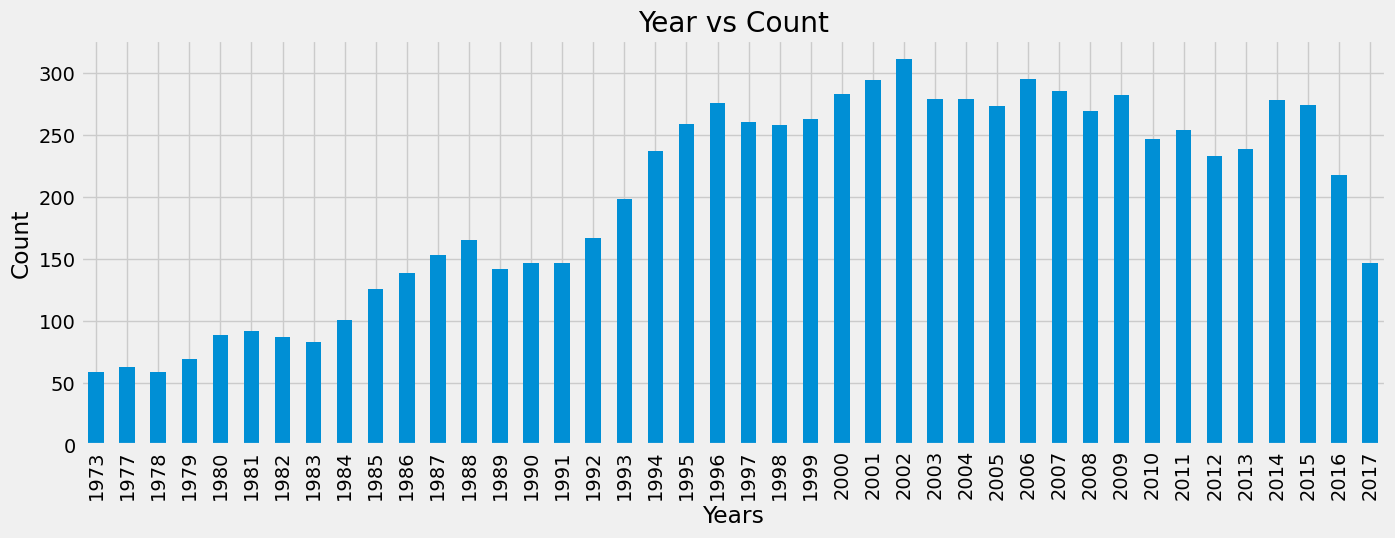

In [14]:
year_wise_movies_df = movies_df[['title']].copy()
print("Total number of movies: {}".format(movies_df.shape[0]))
year_wise_movies_df['year'] = year_wise_movies_df['title'].str.strip().str[-5:-1]
# Remove non numeric rows
year_wise_movies_df = year_wise_movies_df[pd.to_numeric(year_wise_movies_df['year'], errors='coerce').notnull()]
print("Number of movies without year: {}".format(movies_df.shape[0] - year_wise_movies_df.shape[0]))
# Remove years with less than 50 movies
print("Number of years with or under 50 movies: {}".format(len(year_wise_movies_df.groupby('year').filter(lambda x : len(x)<=50))))
year_wise_movies_df = year_wise_movies_df.groupby('year').filter(lambda x : len(x)>50)
print("Plotting for {0} of {1} movies!".format(year_wise_movies_df.shape[0], movies_df.shape[0]))
year_wise_movies_df.groupby(['year']).size().plot(kind = 'bar', figsize=(15,5), title="Year vs Count", xlabel="Years", ylabel="Count")

In [15]:
# prediction & recommendation

In [16]:
# Convert data to format required for surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(reviews_df[['userId', 'movieId', 'rating']], reader)
# Split into train and test
train_set, test_set = train_test_split(data, test_size=.2)

In [17]:
# Cross validation

In [18]:
def precision_recall_calculation(predictions, threshold=3.5):
    # First map the predictions to each user.
    user_predict_true = defaultdict(list)
    for user_id, movie_id, true_rating, predicted_rating, _ in predictions:
        user_predict_true[user_id].append((predicted_rating, true_rating))

    precisions = dict()
    recalls = dict()
    for user_id, user_ratings in user_predict_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Number of relevant items
        no_of_relevant_items = sum((true_rating >= threshold) for (predicted_rating, true_rating) in user_ratings)
        # Number of recommended items in top 10
        no_of_recommended_items = sum((predicted_rating >= threshold) for (predicted_rating, true_rating) in user_ratings[:10])
        # Number of relevant and recommended items in top 10
        no_of_relevant_and_recommended_items = sum(((true_rating >= threshold) and (predicted_rating >= threshold)) for (predicted_rating, true_rating) in user_ratings[:10])
        # Precision: Proportion of recommended items that are relevant
        precisions[user_id] = no_of_relevant_and_recommended_items / no_of_recommended_items if no_of_recommended_items != 0 else 1
        # Recall: Proportion of relevant items that are recommended
        recalls[user_id] = no_of_relevant_and_recommended_items / no_of_relevant_items if no_of_relevant_items != 0 else 1

    # Averaging the values for all users
    average_precision=sum(precision for precision in precisions.values()) / len(precisions)
    average_recall=sum(recall for recall in recalls.values()) / len(recalls)
    F_score=(2*average_precision*average_recall) / (average_precision + average_recall)

    return [average_precision, average_recall, F_score]

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [20]:
rows = []
algorithms = [SVD(), SVDpp(), SlopeOne(), NormalPredictor(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), CoClustering(), GaussianNB()]

for algorithm in algorithms:
    avg_dict = {}
    algorithm_name = str(algorithm).split(' ')[0].split('.')[-1]
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    for k, v in results.items(): avg_dict[k] = sum(v)/ float(len(v))
#     algorithm.fit(train_set)
#     predictions = algorithm.test(test_set)
#     precision, recall, F_score = precision_recall_calculation(predictions, threshold=3.5)
    rows.append([algorithm_name, avg_dict['test_rmse'], avg_dict['test_mae'], avg_dict['fit_time'], avg_dict['test_time']])

benchmarks_df = pd.DataFrame(rows, columns=['Algorithm', 'test_rmse', 'test_mae', 'fit_time', 'test_time'])
display(benchmarks_df)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


TypeError: GaussianNB.fit() missing 1 required positional argument: 'y'

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Load the dataset
df = pd.read_csv('movie_lens_data.csv')  # Update the path to your dataset

# Select relevant training data
train_data = df[df['movie_id'].isin(train_movies)]  # Assuming train_movies is defined

# Prepare training features and target variable
X_train = train_data[['user_id', 'rating']]  # Features: user_id and rating
y_train = train_data['rating']  # Target variable: rating

# Initialize and train the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Prepare test features for prediction
test_data = df[~df['movie_id'].isin(train_movies)]  # Movies not in training set
X_test = test_data[['user_id', 'rating']]  # Features for test set

# Predict ratings for test data
y_pred = classifier.predict(X_test)

# Display predicted ratings
print("Predicted ratings:", y_pred)
